Jupyter Lab tutorial: https://www.youtube.com/watch?v=A5YyoCKxEOU

Cheatsheet: https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

In [215]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.mode.chained_assignment = None  # default='warn'

In [216]:
# Read from csv:
df = pd.read_csv('data_20210603.csv', sep=';')
df.head()

,domain_name,is_fleet,domain_status,first_subscription_start_dt,terminated_dt,reference_dt,monthly_billing,annual_billing,one_year_subscription,three_years_subscription,...,tickets_cs_amt,sat_score_cs,tickets_other_amt,sat_score_other,tickets_cs_last7d_amt,tickets_other_last7d_amt,trips_2_mths_ago,trips_last_30_days,trips_development_abs,distance_development_pct
0,com.vimcar.de.k62964790,True,active,2021-02-01 00:00:00.0,NaN,2021-06-07 00:00:00.0,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,101.0,92.0,-9.0,-6.0
1,com.vimcar.de.k14436980,True,active,2018-05-01 00:00:00.0,NaN,2021-06-07 00:00:00.0,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,com.vimcar.vc-solution,True,active,2016-03-21 00:00:00.0,NaN,2021-06-07 00:00:00.0,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,291.0,216.0,-75.0,-31.0
3,com.vimcar.stan-studios-com,True,active,2017-10-13 00:00:00.0,NaN,2021-06-07 00:00:00.0,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,79.0,-3.0,-120.0
4,com.vimcar.de.k26321123,True,active,2019-01-01 00:00:00.0,NaN,2021-06-07 00:00:00.0,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,519.0,452.0,-67.0,3.0


In [217]:
f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns.'

'Dataset has 6157 rows and 27 columns.'

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   domain_name                  6157 non-null   object 
 1   is_fleet                     6157 non-null   bool   
 2   domain_status                6157 non-null   object 
 3   first_subscription_start_dt  6157 non-null   object 
 4   terminated_dt                853 non-null    object 
 5   reference_dt                 6157 non-null   object 
 6   monthly_billing              6157 non-null   bool   
 7   annual_billing               6157 non-null   bool   
 8   one_year_subscription        6157 non-null   bool   
 9   three_years_subscription     6157 non-null   bool   
 10  mrr                          6157 non-null   float64
 11  mrr_logbook                  6157 non-null   float64
 12  mrr_admin                    6157 non-null   float64
 13  mrr_geo           

In [219]:
# Unique values in domain status:
print(df['domain_status'].unique())
df['domain_status'].nunique()

['active' 'terminated' 'canceled']


3

In [220]:
# Change data types (if needed):
cols_to_num = ['mrr','mrr_logbook','mrr_admin', 'mrr_geo','mrr_pro','mrr_fsk',
              'trips_2_mths_ago','trips_last_30_days','trips_development_abs','distance_development_pct']

for col in cols_to_num:
    df[col] = pd.to_numeric(df[col])
    

cols_to_date = ['first_subscription_start_dt', 'terminated_dt', 'reference_dt', 'created_at' ]

for col in cols_to_date:
    df[col] = pd.to_datetime(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   domain_name                  6157 non-null   object        
 1   is_fleet                     6157 non-null   bool          
 2   domain_status                6157 non-null   object        
 3   first_subscription_start_dt  6157 non-null   datetime64[ns]
 4   terminated_dt                853 non-null    datetime64[ns]
 5   reference_dt                 6157 non-null   datetime64[ns]
 6   monthly_billing              6157 non-null   bool          
 7   annual_billing               6157 non-null   bool          
 8   one_year_subscription        6157 non-null   bool          
 9   three_years_subscription     6157 non-null   bool          
 10  mrr                          6157 non-null   float64       
 11  mrr_logbook                  6157 non-null 

In [221]:
# Which columns have Nulls:
df.isna().any()

domain_name                    False
is_fleet                       False
domain_status                  False
first_subscription_start_dt    False
terminated_dt                   True
reference_dt                   False
monthly_billing                False
annual_billing                 False
one_year_subscription          False
three_years_subscription       False
mrr                            False
mrr_logbook                    False
mrr_admin                      False
mrr_geo                        False
mrr_pro                        False
mrr_fsk                        False
created_at                     False
tickets_cs_amt                  True
sat_score_cs                    True
tickets_other_amt               True
sat_score_other                 True
tickets_cs_last7d_amt           True
tickets_other_last7d_amt        True
trips_2_mths_ago                True
trips_last_30_days              True
trips_development_abs           True
distance_development_pct        True
d

In [222]:
# Replace NaN with 0:
df['tickets_cs_amt'] = df['tickets_cs_amt'].fillna(0)
df['tickets_other_amt'] = df['tickets_other_amt'].fillna(0)
df['tickets_cs_last7d_amt'] = df['tickets_cs_last7d_amt'].fillna(0)
df['tickets_other_last7d_amt'] = df['tickets_other_last7d_amt'].fillna(0)
df['trips_2_mths_ago'] = df['trips_2_mths_ago'].fillna(0)
df['trips_development_abs'] = df['trips_development_abs'].fillna(0)
df['distance_development_pct'] = df['distance_development_pct'].fillna(0)

In [223]:
# Create additional columns:
df['churned'] = np.where(df['domain_status'] == 'active', False, True)
df['tickets_cs'] = np.where(df['tickets_cs_amt'] > 0, True, False)
df['tickets_other']   = np.where(df['tickets_other_amt'] > 0, True, False)

# Create product columns:
df['logbook'] = np.where(df['mrr_logbook'] > 0, 1, 0)
df['admin']   = np.where(df['mrr_admin'] > 0, 1, 0)
df['geo']     = np.where(df['mrr_geo'] > 0, 1, 0)
df['pro']     = np.where(df['mrr_pro'] > 0, 1, 0)
df['fsk']     = np.where(df['mrr_fsk'] > 0, 1, 0)

In [224]:
# Drop columns with keyword "created
df.drop(list(df.filter(regex = 'created_at')), axis = 1, inplace = True)

df.head()

,domain_name,is_fleet,domain_status,first_subscription_start_dt,terminated_dt,reference_dt,monthly_billing,annual_billing,one_year_subscription,three_years_subscription,...,trips_development_abs,distance_development_pct,churned,tickets_cs,tickets_other,logbook,admin,geo,pro,fsk
0,com.vimcar.de.k62964790,True,active,2021-02-01,NaT,2021-06-07,False,True,True,False,...,-9.0,-6.0,False,False,False,1,0,0,0,0
1,com.vimcar.de.k14436980,True,active,2018-05-01,NaT,2021-06-07,False,True,True,False,...,0.0,0.0,False,False,False,1,0,0,0,0
2,com.vimcar.vc-solution,True,active,2016-03-21,NaT,2021-06-07,False,True,True,False,...,-75.0,-31.0,False,False,False,1,0,0,0,0
3,com.vimcar.stan-studios-com,True,active,2017-10-13,NaT,2021-06-07,False,True,True,False,...,-3.0,-120.0,False,False,False,1,0,0,0,0
4,com.vimcar.de.k26321123,True,active,2019-01-01,NaT,2021-06-07,False,True,True,False,...,-67.0,3.0,False,False,False,1,0,0,0,0


#### Create funcion calculating customer's days with Vimcar:

In [225]:
today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00

def days_with_vimcar(row):
    if row['churned'] == True and (row['terminated_dt'] < row['first_subscription_start_dt']):
        return 0
    elif row['churned'] == True:
        return (row['terminated_dt'] - row['first_subscription_start_dt']).days
    else:
        today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00
        return (today - row['first_subscription_start_dt']).days
        

In [226]:
# Test if calculates correctly:
df.apply (lambda row: days_with_vimcar(row), axis=1)  # applied to each row

0        183
1       1190
2       1961
3       1390
4        945
        ... 
6152     755
6153     730
6154    1152
6155     453
6156     314
Length: 6157, dtype: int64

In [227]:
# If the function output is correct then assign it to new column:
df['days_retained'] = df.apply (lambda row: days_with_vimcar(row), axis=1)
df['days_retained'].describe()

count    6157.000000
mean      693.104921
std       472.084943
min         0.000000
25%       307.000000
50%       584.000000
75%       980.000000
max      2406.000000
Name: days_retained, dtype: float64

In [228]:
# There is one subscription which apparently starts in the future (negative days_retained):
df[df['days_retained'] == df['days_retained'].min()]

,domain_name,is_fleet,domain_status,first_subscription_start_dt,terminated_dt,reference_dt,monthly_billing,annual_billing,one_year_subscription,three_years_subscription,...,distance_development_pct,churned,tickets_cs,tickets_other,logbook,admin,geo,pro,fsk,days_retained
13,com.vimcar.de.k13410957,True,terminated,2019-01-01,2018-12-13,2018-12-13,False,True,True,False,...,100.0,True,False,False,1,0,0,0,0,0
176,com.vimcar.de.k58528103,True,canceled,2021-04-21,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,0,0,0,1,0,0
204,com.vimcar.de.k50453943,True,canceled,2021-05-12,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,1,0,0,0,0,0
431,com.vimcar.de.k20398114,True,canceled,2021-05-14,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,1,0,0,0,0,0
598,com.vimcar.de.k34585722,True,terminated,2020-05-01,2020-04-27,2020-04-27,True,False,True,False,...,0.0,True,True,True,0,0,0,1,0,0
936,com.vimcar.de.k21579236,True,terminated,2019-06-01,2019-05-17,2019-05-17,False,True,True,False,...,0.0,True,False,False,0,0,1,0,0,0
1044,com.vimcar.de.k39969421,True,canceled,2021-04-27,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,1,0,0,0,0,0
1080,com.vimcar.de.k82506702,True,terminated,2019-11-01,2019-10-08,2019-10-08,False,True,True,False,...,0.0,True,False,False,0,0,1,0,0,0
1278,com.vimcar.de.k68869037,True,canceled,2021-06-02,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,1,0,0,0,0,0
1557,com.vimcar.de.k34938348,True,canceled,2021-05-14,2021-03-30,2021-03-30,False,True,True,False,...,0.0,True,False,False,1,0,0,0,0,0


# EDA

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='churned', ylabel='count'>

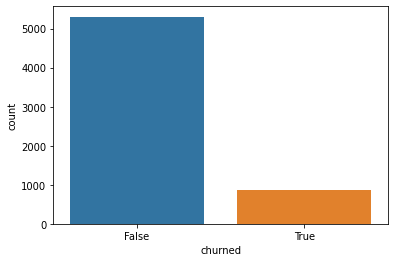

In [229]:
# Visualize the count of customer churn::
sns.countplot(df['churned'])

In [230]:
# What is the percentage of customer that are leaving:
num_reteined = df[df['churned'] == False].shape[0]
num_churned = df[df['churned'] == True].shape[0]

print(num_reteined / (num_reteined + num_churned) * 100, '% of customer stayed with the company.')
print(num_churned / (num_reteined + num_churned) * 100, '% of customer churned.')

86.14585025174598 % of customer stayed with the company.
13.854149748254018 % of customer churned.


In [231]:
mrr_reteined = np.where(df['churned'] == False, df['mrr'],0).sum()
mrr_churned = np.where(df['churned'] == True, df['mrr'],0).sum()

print(mrr_reteined / (mrr_reteined + mrr_churned) * 100, '% of MRR stayed with the company.')
print(mrr_churned / (mrr_reteined + mrr_churned) * 100, '% of MRR churned.')

87.46772108436045 % of MRR stayed with the company.
12.532278915639555 % of MRR churned.


In [232]:
# Drop columns which are not relevant
df.drop(columns = ['is_fleet', 'sat_score_cs', 'sat_score_other', 'tickets_cs_last7d_amt' ,'tickets_other_last7d_amt'], inplace = True)

<AxesSubplot:xlabel='days_retained', ylabel='mrr'>

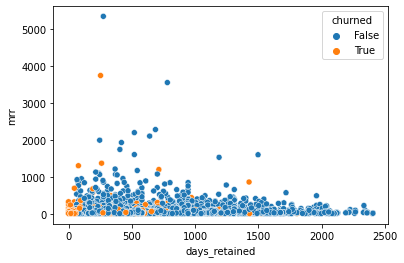

In [233]:
sns.scatterplot(data=df, x="days_retained", y="mrr", hue="churned")

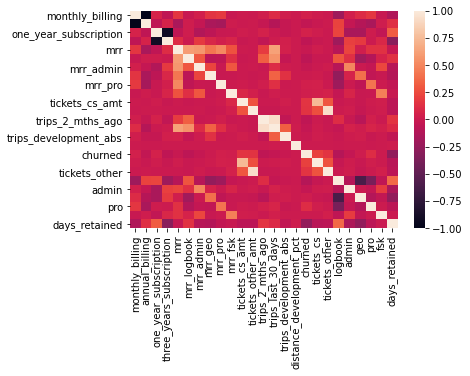

In [234]:
sns.heatmap(df.corr());

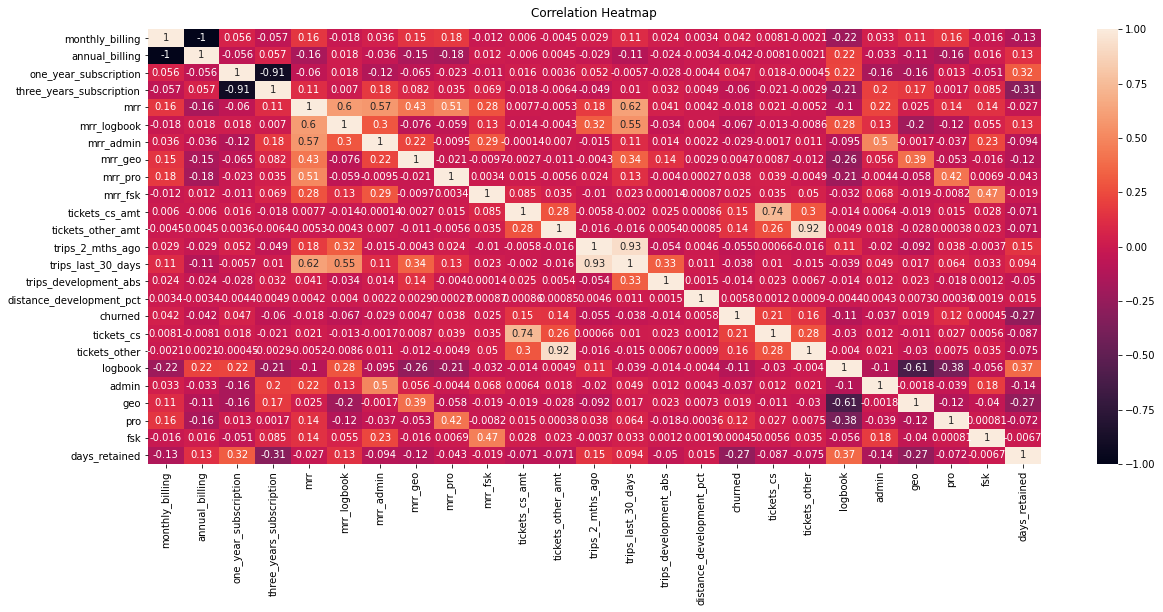

In [235]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='churned', ylabel='count'>

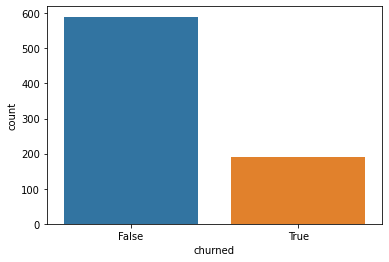

In [236]:
# Pro licenses customers:
df_pro = df[df['pro'] == 1]
sns.countplot(df_pro['churned'])

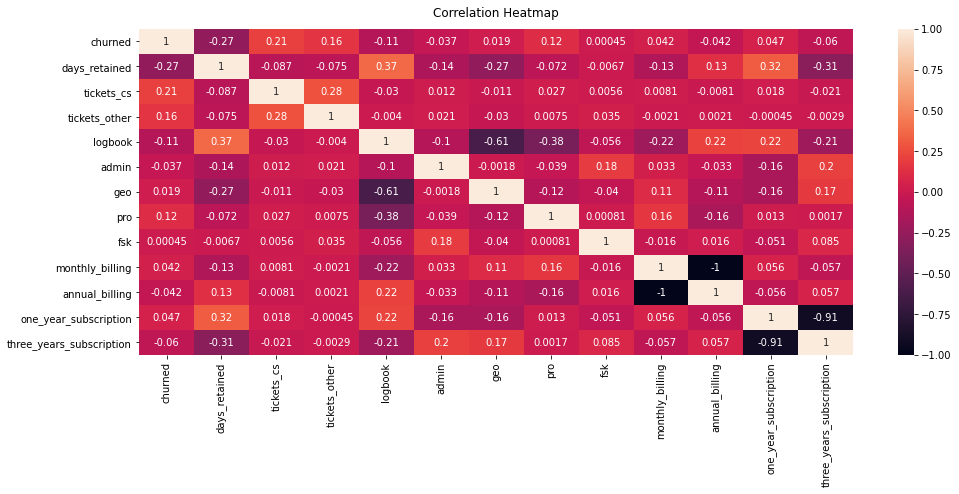

In [237]:
df_categorical = df[['churned','days_retained','tickets_cs', 'tickets_other', 
                 'logbook','admin','geo', 'pro', 'fsk', 
                    'monthly_billing', 'annual_billing', 'one_year_subscription', 'three_years_subscription']]

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_categorical.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:>

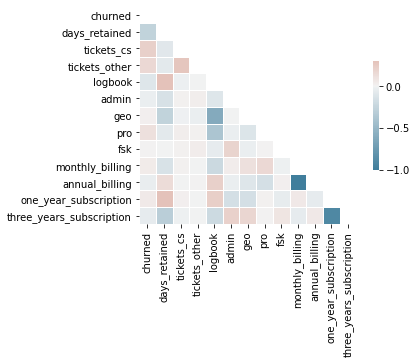

In [238]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_categorical.corr(), dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_categorical.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Cleaned / ML

In [239]:
df_cleaned = df[['churned','days_retained','tickets_cs', 'tickets_other', 
                 'mrr', 'mrr_logbook','mrr_admin','mrr_geo', 'mrr_pro', 'mrr_fsk',
                'trips_development_abs', 'distance_development_pct']]
df_cleaned.head()

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,False,183,False,False,14.93,14.93,0.0,0.0,0.0,0.0,-9.0,-6.0
1,False,1190,False,False,243.27,243.27,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1961,False,False,63.60,63.60,0.0,0.0,0.0,0.0,-75.0,-31.0
3,False,1390,False,False,57.24,57.24,0.0,0.0,0.0,0.0,-3.0,-120.0
4,False,945,False,False,42.93,42.93,0.0,0.0,0.0,0.0,-67.0,3.0


In [240]:
df_cleaned.describe()

,days_retained,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6.157000e+03
mean,693.104921,74.007648,40.519227,5.249550,13.055561,13.820758,0.911062,-0.394023,-7.063175e+02
std,472.084943,157.409433,85.761643,36.434672,67.938669,86.677264,15.735061,174.597745,4.711192e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4394.000000,-3.651756e+06
25%,307.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,584.000000,37.810000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,980.000000,71.550000,42.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,2406.000000,5344.000000,2035.200000,1461.600000,3057.300000,3554.080000,855.000000,10540.000000,1.000000e+02


In [241]:
# Convert all of the non-numeric columns to numeric:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == np.number:
        df_cleaned[column] = df_cleaned[column].astype(np.int64)
        
    df_cleaned[column] = LabelEncoder().fit_transform(df_cleaned[column])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
df_cleaned.describe()

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000
mean,0.138541,597.339938,0.006984,0.003898,59.945590,27.453468,3.464350,6.509014,6.860971,0.375670,251.211467,240.765633
std,0.345495,373.770206,0.083284,0.062317,72.583483,38.562557,17.119859,20.184814,24.294513,3.664054,52.868569,41.587986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,283.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
50%,0.000000,528.000000,0.000000,0.000000,34.000000,12.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
75%,0.000000,853.000000,0.000000,0.000000,68.000000,35.000000,0.000000,0.000000,0.000000,0.000000,251.000000,244.000000
max,1.000000,1466.000000,1.000000,1.000000,435.000000,247.000000,161.000000,161.000000,186.000000,60.000000,497.000000,342.000000


In [243]:
df_cleaned

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,0,167,0,0,11,7,0,0,0,0,242,238
1,0,1023,0,0,227,156,0,0,0,0,251,244
2,0,1409,0,0,60,55,0,0,0,0,177,213
3,0,1149,0,0,54,49,0,0,0,0,248,130
4,0,841,0,0,39,35,0,0,0,0,184,247
...,...,...,...,...,...,...,...,...,...,...,...,...
6152,0,669,0,0,52,7,0,0,33,0,251,244
6153,0,647,0,0,87,78,0,0,0,0,194,241
6154,0,995,0,0,68,62,0,0,0,0,330,253
6155,1,418,0,0,40,0,0,0,34,0,251,244


In [259]:
# Can be removed later, only for testing:
# df_churned = df_cleaned[df_cleaned['churned'] == True]
df_piotr_test = df_cleaned.iloc[:11]
# df_piotr_test = df_cleaned.iloc[[3]]
# df_churned
df_piotr_test

,churned,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,0,167,0,0,11,7,0,0,0,0,242,238
1,0,1023,0,0,227,156,0,0,0,0,251,244
2,0,1409,0,0,60,55,0,0,0,0,177,213
3,0,1149,0,0,54,49,0,0,0,0,248,130
4,0,841,0,0,39,35,0,0,0,0,184,247
5,1,11,0,0,9,0,0,4,0,0,251,244
6,0,516,0,0,12,8,0,0,0,0,251,244
7,0,841,0,0,10,6,0,0,0,0,217,241
8,1,39,1,1,19,0,0,0,15,0,247,15
9,0,859,0,0,51,46,0,0,0,0,251,244


In [157]:
# Can be removed later, only for testing:
# df_cleaned = df_cleaned.merge(df_piotr_test, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
# df_cleaned = df_cleaned.iloc[: , :-1]

In [244]:
# Split features and target
X = df_cleaned.drop('churned', axis=1)  # Features data set
y = df_cleaned['churned']  # Target data set

In [245]:
# Scaled the data
X = StandardScaler().fit_transform(X)

In [246]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
y_train

4176    0
911     0
2886    0
47      0
2486    0
       ..
3772    0
5191    0
5226    1
5390    0
860     0
Name: churned, Length: 4925, dtype: int64

In [248]:
# Create the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [249]:
# Create the predictions on the test data
predictions = model.predict(X_test)

print(predictions)

[0 0 0 ... 0 0 0]


In [250]:
# Check the precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1061
           1       0.83      0.11      0.20       171

    accuracy                           0.87      1232
   macro avg       0.85      0.55      0.56      1232
weighted avg       0.87      0.87      0.83      1232



In [251]:
cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

0.872177487419161

In [252]:
y.value_counts(normalize=True)

0    0.861459
1    0.138541
Name: churned, dtype: float64

In [253]:
df_pred = pd.DataFrame(model.predict(X_test))
# df_pred[df_pred[0] == 1]
df_pred.shape

(1232, 1)

In [254]:
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)
# df_out = pd.merge(df_X_test, y_test,  left_index=True, right_index=True)
df_out = pd.merge(df_X_test, df_pred, how='left', left_index=True, right_index=True)
df_out = pd.merge(df_out, df_y_test, how='left', left_index=True, right_index=True)



In [257]:
df_out

,0_x,1,2,3,4,5,6,7,8,9,10,0_y,churned
0,-0.688554,-0.083863,-0.062556,0.731003,0.766260,-0.202375,1.262982,-0.282431,-0.102537,-0.514742,0.438488,0,NaN
1,-0.825012,-0.083863,-0.062556,3.293777,-0.711978,8.384842,-0.322497,-0.282431,11.634053,-0.004000,0.077778,0,NaN
2,0.651951,-0.083863,-0.062556,-0.440158,-0.089562,-0.202375,-0.322497,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
3,1.395784,-0.083863,-0.062556,0.110977,0.895930,-0.202375,-0.322497,-0.282431,-0.102537,-1.819971,-0.306980,0,NaN
4,-1.076524,-0.083863,-0.062556,2.398184,3.411527,-0.202375,-0.322497,-0.282431,-0.102537,0.468909,-0.451264,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0.558303,-0.083863,-0.062556,0.000750,-0.167364,-0.202375,0.668427,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
1228,-0.934714,-0.083863,-0.062556,3.376447,3.618999,4.412524,-0.322497,-0.282431,-0.102537,2.379462,0.799199,0,NaN
1229,-0.070477,-0.083863,-0.062556,-0.440158,-0.089562,-0.202375,-0.322497,-0.282431,-0.102537,-0.004000,0.077778,0,NaN
1230,-1.044416,-0.083863,-0.062556,-0.329931,0.117910,-0.202375,-0.322497,-0.282431,-0.102537,-0.325578,0.270157,0,NaN


In [211]:
# Can be removed later, testing only:
df_churned = df_churned.iloc[: , 1:]
df_churned

,days_retained,tickets_cs,tickets_other,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_fsk,trips_development_abs,distance_development_pct
0,167,0,0,11,7,0,0,0,0,242,238
1,1023,0,0,227,156,0,0,0,0,251,244
2,1409,0,0,60,55,0,0,0,0,177,213
3,1149,0,0,54,49,0,0,0,0,248,130
4,841,0,0,39,35,0,0,0,0,184,247
5,11,0,0,9,0,0,4,0,0,251,244
6,516,0,0,12,8,0,0,0,0,251,244
7,841,0,0,10,6,0,0,0,0,217,241
8,39,1,1,19,0,0,0,15,0,247,15
9,859,0,0,51,46,0,0,0,0,251,244


In [260]:
# Can be removed later, testing only:
df_piotr_test = df_piotr_test.drop('churned', axis=1) 
predictions_2 = model.predict(df_piotr_test)

print(predictions_2)

[0 0 0 0 0 0 0 0 0 0 0]


In [262]:
pd.DataFrame(y_train)

,churned
4176,0
911,0
2886,0
47,0
2486,0
...,...
3772,0
5191,0
5226,1
5390,0


In [214]:
test = StandardScaler().fit_transform(df_churned)
test

array([[-1.03551313, -0.31622777, -0.31622777, -0.61321826, -0.58825064,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.31188053,
         0.40998596],
       [ 0.83166259, -0.31622777, -0.31622777,  3.01117623,  2.79470657,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.64749111,
         0.49616135],
       [ 1.67363669, -0.31622777, -0.31622777,  0.20898234,  0.50156107,
         0.        , -0.37947332, -0.31622777,  0.        , -2.11197362,
         0.05092182],
       [ 1.10650388, -0.31622777, -0.31622777,  0.10830472,  0.36533461,
         0.        , -0.37947332, -0.31622777,  0.        ,  0.53562092,
        -1.14117111],
       [ 0.43466962, -0.31622777, -0.31622777, -0.14338934,  0.04747286,
         0.        , -0.37947332, -0.31622777,  0.        , -1.85094317,
         0.53924905],
       [-1.37579282, -0.31622777, -0.31622777, -0.64677747, -0.74718152,
         0.        ,  0.31622777, -0.31622777,  0.        ,  0.64749111,
         0.496